In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
federal_df = pd.read_csv('HW4-data-fedPapers85.csv')
federal_df.shape

(85, 72)

In [3]:
federal_df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


<AxesSubplot:>

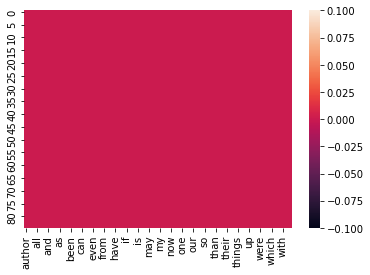

In [4]:
# checking for missing values
sns.heatmap(federal_df.isnull())

<AxesSubplot:>

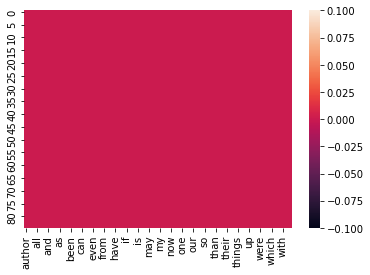

In [5]:
sns.heatmap(federal_df.isna())

#### 1. DATA  PREPARATION

Separating original dataset to training and testing data for classification.

In [6]:
# removing disputed essays from the training and testing data
temp_df = federal_df[federal_df['author']!='dispt']
temp_df = temp_df[temp_df['author']!='Jay']
temp_df = temp_df[temp_df['author']!='HM']

temp_df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [7]:
# disputed essays
distputed_essays = federal_df[federal_df['author']=='dispt']
distputed_train = distputed_essays.iloc[:,2:]

In [8]:
temp_df.shape # 74 samples used for train and testing the model which does not contain any disputed essays

(66, 72)

In [9]:
distputed_essays.shape # 11 disupted essays that needs to be classified

(11, 72)

In [10]:
X = temp_df.iloc[:,2:] # independent variables
Y = temp_df['author'] # dependent variables

In [11]:
Y.unique() # categories to predict

array(['Hamilton', 'Madison'], dtype=object)

In [12]:
# splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.4) 

#### 2. MODEL BUILDING

#### Model-1 : Naive Bayes Classifier

In [13]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [14]:
# predict
naive_train_pred = gnb.predict(X_train)

naive_train_pred

array(['Madison', 'Hamilton', 'Hamilton', 'Madison', 'Hamilton',
       'Madison', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Madison', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Madison', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Madison', 'Hamilton',
       'Hamilton', 'Madison', 'Hamilton', 'Hamilton'], dtype='<U8')

In [15]:
# validating training data
tab = pd.crosstab(Y_train, naive_train_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,Hamilton,Madison
Actual,,
Hamilton,29,0
Madison,0,10


In [16]:
# predict
naive_test_pred = gnb.predict(X_test)

naive_test_pred

array(['Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Madison',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Madison', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton'], dtype='<U8')

In [17]:
# validating testing data
tab = pd.crosstab(Y_test, naive_test_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,Hamilton,Madison
Actual,,
Hamilton,22,0
Madison,3,2


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

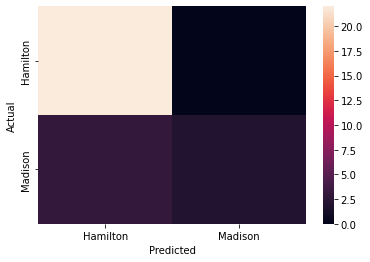

In [18]:
sns.heatmap(tab)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, naive_test_pred))

              precision    recall  f1-score   support

    Hamilton       0.88      1.00      0.94        22
     Madison       1.00      0.40      0.57         5

    accuracy                           0.89        27
   macro avg       0.94      0.70      0.75        27
weighted avg       0.90      0.89      0.87        27



In [21]:
import sklearn.metrics as skm

# F1 Score
skm.f1_score(Y_test,naive_test_pred,average="macro")

0.7537993920972645

NAIVE BAYES - PREDICTION

In [ ]:
gnb.predict(distputed_train)

#### MODEL  2 - DECISION TREES

In [ ]:
# training the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy') # entropy to measure the purity of the split 
clf.fit(X_train,Y_train)

In [ ]:
# predicting on test data
test_pred=clf.predict(X_test)
test_pred

In [ ]:
# predicting on training data
train_pred = clf.predict(X_train)
train_pred

In [ ]:
# validating training data
tab1 = pd.crosstab(Y_train, train_pred, rownames=['Actual'],colnames=['Predicted'])
tab1

In [ ]:
sns.heatmap(tab1)

In [ ]:
# validating testing data
tab1 = pd.crosstab(Y_test, test_pred, rownames=['Actual'],colnames=['Predicted'])
tab1

In [ ]:
sns.heatmap(tab1)

#### PREDICTION

In [ ]:
dispt_pred=clf.predict(distputed_train)
dispt_pred